In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The Model

The model this analysis has chosen is a Lasso model with no polynomial features and a regularization parameter of $\lambda=0.00497$. This model was chosen via multiple grid searches, and was superior to Ridge and ElasticNet models tested under the same conditions.

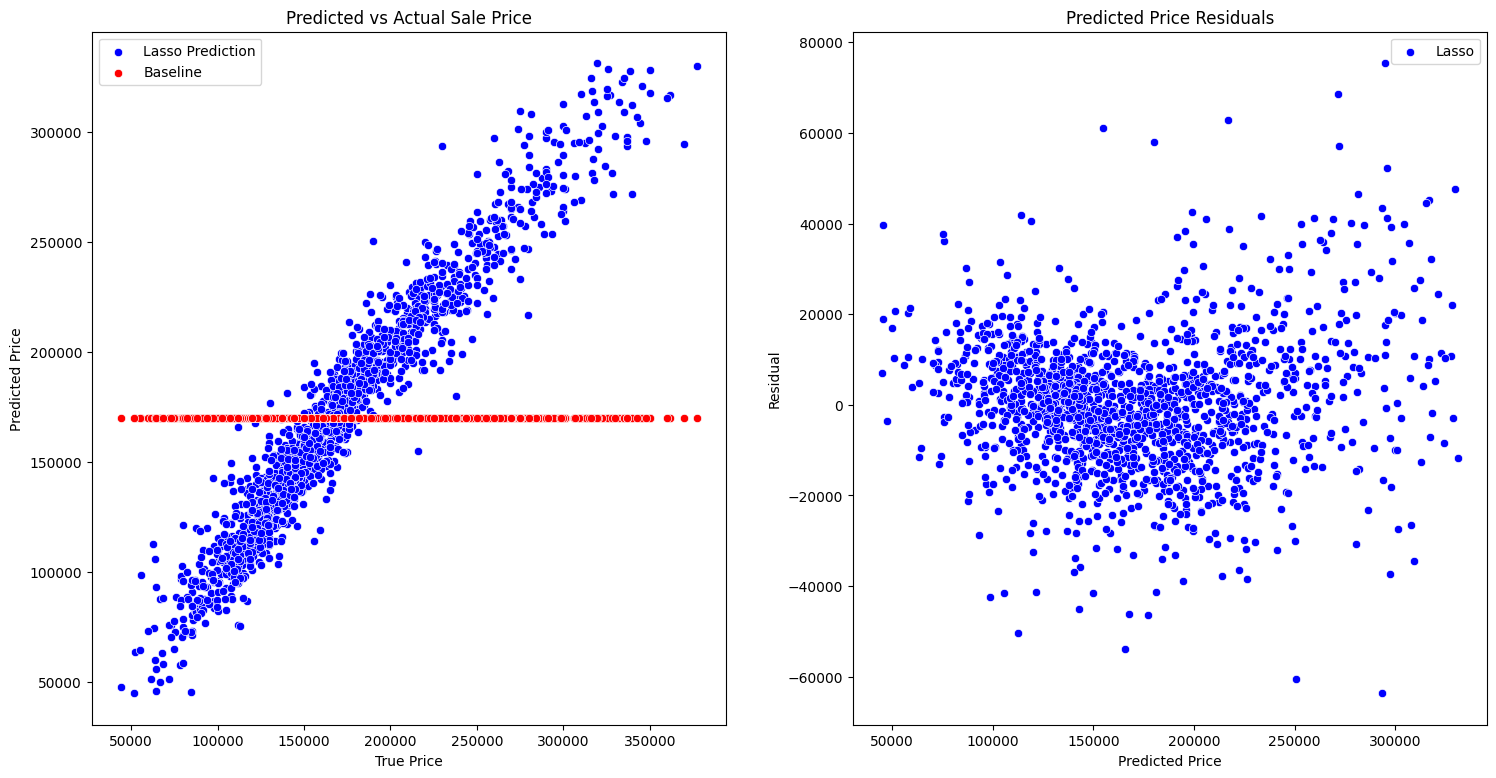

In [2]:
predictions = pd.read_csv("../assets/domain_predictions.csv")
predictions["residual"] = predictions["y_true"] - predictions["y_pred"]
predictions["baseline"] = predictions["y_true"].mean()

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18, 9)
sns.scatterplot(predictions, x="y_true", y="y_pred", ax=axs[0], color="blue", label="Lasso Prediction")
sns.scatterplot(predictions, x="y_true", y="baseline", ax=axs[0], color="red", label="Baseline")
axs[0].set_title("Predicted vs Actual Sale Price")
axs[0].set_xlabel("True Price")
axs[0].set_ylabel("Predicted Price")
sns.scatterplot(predictions, x="y_pred", y="residual", ax=axs[1], label="Lasso", color="blue")
axs[1].set_title("Predicted Price Residuals")
axs[1].set_xlabel("Predicted Price")
axs[1].set_ylabel("Residual")
plt.savefig("../img/residuals.png")

# Results Compared to Baseline

The two plots above display how predictions are distributed compared to the actual price. For the chosen Lasso model, the fit is quite nice with a strong linear relationship. This is in contrast with the baseline performance in red, taken as the mean of the sale price. The residuals are also displayed, and it is seen that most of the points fall within ~$20000 of the actual price.

In [3]:
y_pred, y_true = predictions["y_pred"].values, predictions["y_true"].values
baseline = predictions["baseline"].values
r_squared = 1 - np.sum((y_pred - y_true) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
rmse = np.sqrt(np.sum((y_pred - y_true) ** 2) / len(y_pred))
baseline_rmse = np.sqrt(np.sum((baseline - y_true) ** 2) / len(baseline))

print(f"Lasso R2: {round(r_squared, 3)}")
print(f"Lasso RMSE: {round(rmse, 3)}, Baseline RMSE: {round(baseline_rmse, 3)}")

Lasso R2: 0.937
Lasso RMSE: 14401.42, Baseline RMSE: 57178.202


In more concrete terms using numerical metrics, the Lasso model has an $R^2$ of roughly 0.937 on the training data. This is a good fit, and indicates that some 93% of the variance in the dataset is explained by the linear model. The RMSE for the Lasso model is \\$14401, which is clearly superior to the baseline RMSE of over \\$57000. The baseline, in this case, predicting the average sale price regardless of input.

# Price per Area

An alternative target variable was explored during this analysis, being the price per unit livable area in a home (not including basements).

In [4]:
model_stats = pd.read_csv("../assets/model_results_20221208170253.csv")
model_stats.groupby(by=["target"]).mean(numeric_only=True)[["train_score", "val_score"]]

,train_score,val_score
target,,
price_per_area,0.822871,0.783998
saleprice,0.803019,0.768891


On average, across all versions of models, features, and hyperparameters that were tested, the constructed target price_per_area performed slightly better. This is likely because it allows the quality of home features to be separated from its size, but ultimately the best models had sale price as the target. In a future, more in-depth analysis, price per area may prove to be superior with proper feature engineering and selection.

# Best Choices for Models

In [5]:
model_stats.sort_values(by=["val_rmse"], ascending=True).head(25)

,regressor,imputer,feature_set,area_set,time_set,split_name,covariance_threshold,target,train_score,val_score,cross_val_score,train_rmse,val_rmse
1732,lasso_0.01,mean,full,total_grade_area,full,no_split,0.0,saleprice,0.921374,0.905949,0.913029,14925.817030,16883.407446
1752,ridge_0.01,mean,full,total_grade_area,full,no_split,0.0,saleprice,0.921374,0.905949,0.913029,14925.817030,16883.407446
436,lasso_0.01,knn,full,full,full,no_split,0.0,saleprice,0.921177,0.905692,0.913085,14954.431728,16884.491988
456,ridge_0.01,knn,full,full,full,no_split,0.0,saleprice,0.921177,0.905692,0.913085,14954.431728,16884.491988
17304,ridge_0.01,mean,full,total_grade_area,year_and_month,no_split,0.0,saleprice,0.918833,0.905774,0.912698,15155.059352,16888.122382
17284,lasso_0.01,mean,full,total_grade_area,year_and_month,no_split,0.0,saleprice,0.918833,0.905774,0.912698,15155.059352,16888.122382
2184,ridge_0.01,knn,full,total_grade_area,full,no_split,0.0,saleprice,0.921494,0.905650,0.912629,14917.629433,16912.340991
2164,lasso_0.01,knn,full,total_grade_area,full,no_split,0.0,saleprice,0.921494,0.905650,0.912629,14917.629433,16912.340991
22488,ridge_0.01,mean,full,total_grade_area,timestamp_and_year_month,no_split,0.0,saleprice,0.920925,0.905442,0.912633,14965.535683,16915.209837
22468,lasso_0.01,mean,full,total_grade_area,timestamp_and_year_month,no_split,0.0,saleprice,0.920925,0.905442,0.912633,14965.535683,16915.209837


Analysis showed that, for the most part, models preferred the largest set of features possible with no target-covariance filtering, a full set of features, and a target of sale_price. The regressor variants were all regularized, but their performances were comparable. The only things that should be strictly avoided were OLS models, as they were prone to overfitting and had abysmal cross-validation scores if no variance threshold was set, and data splitting to be discussed below.

# Effects of Data Splitting

The positive effect of splitting the data is that it allows for better fitting on the training data. By grouping similar homes together, more accurate pricing can be learned. However, these models don't generalize well as there simply isn't enough data to properly learn the trends. Overfitting was all but guaranteed in these versions of the model.

In [6]:
model_stats.groupby(by=["split_name"]).mean(numeric_only=True)[["train_score", "val_score"]]

,train_score,val_score
split_name,,
average_condition_split,0.811360,0.784901
no_split,0.796591,0.771986
pid_condition_split,0.835086,0.779359
pid_split,0.808744,0.769532


# Model Inference

Due to the use of automatic Yeo-Johnson transformations to get data distributions into a normal shape, as well as standardization, the coefficients of the model are incredibly hard to interpret. The Yeo-Johnson $\lambda$, as well as the Lasso coeffients can be seen below.

In [7]:
coefs = pd.read_csv("../assets/coefs.csv")
coefs.head(10)

,feature,beta,lambda
0,basement_finished_area,0.181230,0.534669
1,bedroom_abvgr,-0.000000,1.007788
2,bsmt_unf_sf,0.055587,0.372721
3,exterior_developed_area,0.030964,0.375645
4,full_baths,0.017428,0.806574
5,garage_area,0.052133,0.890847
6,garage_cars,0.053695,1.147684
7,garage_yr_blt,0.000000,1.491744
8,gr_liv_area,0.297442,0.559251
9,half_baths,0.000000,0.182104


Taking, for example, the feature basement_finished_area: the feature would first be standardized, and then positive values of the standard feature would be transformed as $z=((x+1)^{0.53} - 1)/0.53$, and negative values would be transformed as $z=-((1-x)^{2-0.53}-1)/(2-0.53)$. Thus, for each unit increase in the theoretical feature $z$, the standardized price would increase by 0.18. While power transformations proved to be a powerful tool for fitting, they reduced any meaning of the coefficients of this model to nearly zero, and I regret implementing them for this task. 

However, there are some coefficients that can be easily interpreted, and those are features which have a coefficient of zero.

In [8]:
coefs["feature"][coefs["beta"] == 0]

1           bedroom_abvgr
7           garage_yr_blt
9              half_baths
16                  pid_9
17         sale_timestamp
              ...        
322    year_month_2006-11
323          yr_sold_2010
325          yr_sold_2006
326          yr_sold_2007
327          yr_sold_2008
Name: feature, Length: 165, dtype: object

Of the 327 features used to fit the model, 165 of them had *no* impact on the fit, and could easily be dropped. In future models, an additional layer of automatic feature detection can be applied, which is to automatically drop features with a coefficient of zero in preliminary fits.

# New Data and Kaggle

The fit for the training domain was excellent, with an RMSE of around 14000. However, when this model was applied to new data, the RMSE was 36671. While this is still considerably better than baseline performance, it indicates that there is a considerable degree of overfiiting happening. To reduce this variance, future models should employ stricter feature selection.

# Conclusions and Recommendations

In conclusion, the grid search techniques used in model selection, as well as the automated feature selection, proved very powerful for creating a fit for the training data. Comparing the fit to validation and test data, the model does generalize to newer data, but not especially well. Therefore, this model should only be used as a supplement and not in lieu of professional appraisal. It will save time and effort, but is prone to mistakes in its current state. 

Due to time constraints, the full breadth of the modeling techniques was not explored. The information included in the model statistics file is quite likely enough to know where to start on creating a model that both performs well and doesn't overfit. Thus, after implementing a grid search, the results should be meticulously studied, much more so than was done in this analysis.

Additional study should also attempt to implement polynomial features, as they would be able to effectively capture multiplicative relationships between features.